# Proyecto #2 

## Creando un portafolio de inversión en base a una simulación Montecarlo
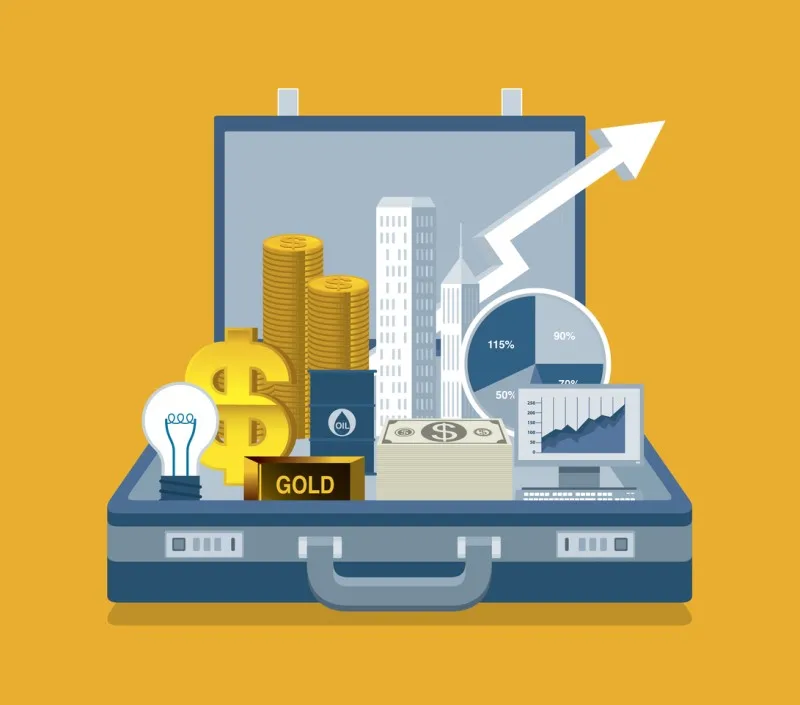

**Integrantes:** <br>
- Francisco Alexander Sotomayor Pineda
- Mónica Santiago
- Nicolás Ramirez Castro

## Descripción General
Un inversionista cuenta con su portafolio de inversión incompleto, pues solamente le falta elegir la empresa del sector minero. El inversionista encuentra un artículo de internet que habla acerca de la proyección de 2 empresas del sector minero, sin embargo, el artículo no le convence y decide predecir el rendimiento por sí mismo. Cuenta con otras dos empresas las cuales se dedican también se dedican a la producción y extracción de metales. Debido a los temores sobre la implementación de una reforma monetaria más restrictiva y el aumento de la inflación se espera que la demanda de metales preciosos aumente. Se espera que el valor de la acción aumente, como mínimo, un 18%. Con estos datos y las empresas obtenidas se planea simular escenarios para determinar la mejor empresa para agregar al portafolio de inversión.

## Objetivo General
Simular 10000 escenarios de 4 empresas del sector minero en México para así poder conocer cuál será mas probable que el precio de su acción suba un 18% del precio actual para añadirla a el portafolio de inversión. 
## Objetivos Especificos 
- Escoger 4 empresas mineras que coticen en la bolsa 

1- Grupo México (GMEXICOB)

2- Industrias Peñoles (PE&OLES)

3- Compañía Minera Autlán SAB de CV (AUTLANB)

4- Minera Frisco SAB de CV (MFRISCOA-1)

- Descargar los datos financieros en jupyter con ayuda de yahoo finance 
- Obtener los rendimientos de cada empresa con los datos descargados 
- Obtener desviación estándar y media de cada empresa 
- Simular los 10000 escenarios para poder determinar rendimientos simulados 
- Obtener precios finales con rendimientos sumados 
- Graficar los datos para determinar fácilmente la mejor opción 


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import random

Primero obtendremos los datos de las empresas con las que vamos a trabajar desde Yahoo Finance. Vamos a analizar los datos del último año, pues consideramos que en el último año el fenómeno de la pandemia ha dejado de afectar el precio de las acciones. Obtendremos solamente el precio ajustado.

In [2]:
def getClose(name,start,end):
    return web.DataReader(name,'yahoo',start,end)['Adj Close']
names = ['GMEXICOB.MX','PE&OLES.MX','AUTLANB.MX','MFRISCOA-1.MX']
data = getClose(names,'2021-11-01','today')
data

Symbols,GMEXICOB.MX,PE&OLES.MX,AUTLANB.MX,MFRISCOA-1.MX
Date,,,,
2021-11-01,84.206314,266.155731,13.283480,3.88
2021-11-03,83.578392,264.356567,13.063918,3.54
2021-11-04,83.344101,271.653168,13.173698,3.56
2021-11-05,82.800537,268.164795,13.163718,3.61
2021-11-08,83.184776,271.383301,13.073898,3.54
...,...,...,...,...
2022-10-26,71.769997,215.410004,16.000000,2.36
2022-10-27,73.470001,207.100006,15.980000,2.36
2022-10-28,70.580002,208.190002,16.000000,2.34


Una vez obtenidos los datos de los precios de nuestras 4 acciones, porcederemos a obtener los rendimientos. Usaremos la fórmula logarítmica pues es una forma más exacta de obtener los rendimientos.

In [3]:
rendimientos = np.log(data/data.shift())

Vamos a desarrollar una función que nos permita simular los rendimientos a partir de las medias y las desviaciones estándar de los rendimientos. Optaremos por una distribución normal. Los datos de entrada de nuestra función van a ser la media, la desviación estándar, la fecha de inicio de la simulación, el número de días de la simulación y el número de simulaciones. Simularemos tres meses de rendimientos, para obetener un resultado más apegado a la realidad, pues entre más tiempo tratemos de simular, hay más probabilidades de que la simulación sea incorrecta.

In [4]:
def sim_r (mean, std, inicio, dias, N):
    r = np.random.normal(mean, std, size = (dias, N))
    fechas = pd.date_range(inicio, periods = dias)
    return pd.DataFrame(index = fechas, data = r)

Vamos a realizar 10,000 simulaciones para cada una de las empresas que escogimos.

In [5]:
media_GMEXICOB = rendimientos['GMEXICOB.MX'].mean()
std_GMEXICOB = rendimientos['GMEXICOB.MX'].std()
media_PEOLES = rendimientos['PE&OLES.MX'].mean()
std_PEOLES = rendimientos['PE&OLES.MX'].std()
media_AUTLANB = rendimientos['AUTLANB.MX'].mean()
std_AUTLANB = rendimientos['AUTLANB.MX'].std()
media_MFRISCOA = rendimientos['MFRISCOA-1.MX'].mean()
std_MFRISCOA = rendimientos['MFRISCOA-1.MX'].std()

In [6]:
print('Desviación estándar de GMEXICOB: ', std_GMEXICOB)
print('Media de GMEXICOB: ', media_GMEXICOB)
print('Desviación estándar de PE&OLES: ', std_PEOLES)
print('Media de PE&OLES: ', media_PEOLES)
print('Desviación estándar de AUTLANB: ', std_AUTLANB)
print('Media de AUTLANB: ', media_AUTLANB)
print('Desviación estándar de MFRISCOA: ', std_MFRISCOA)
print('Media de MFRISCOA: ', media_MFRISCOA)

Desviación estándar de GMEXICOB:  0.026539169974069306
Media de GMEXICOB:  -0.0005466366974916551
Desviación estándar de PE&OLES:  0.032632701410260624
Media de PE&OLES:  -0.0004635941864859352
Desviación estándar de AUTLANB:  0.010906806803028147
Media de AUTLANB:  0.0007325495575711599
Desviación estándar de MFRISCOA:  0.02237087277790663
Media de MFRISCOA:  -0.00199088303323006


Podemos observar que la única empresa con una media postiva es 'AUTLANB', por lo que podemos esperar un mejor rendimiento de esta empresa en las simulaciones.

In [7]:
s_GM = sim_r(media_GMEXICOB, std_GMEXICOB, '2022-11-02', 91, 100000)
s_PO = sim_r(media_PEOLES, std_PEOLES, '2022-11-02', 91, 100000)
s_AUT = sim_r(media_AUTLANB, std_AUTLANB, '2022-11-02', 91, 100000)
s_MFRIS = sim_r(media_MFRISCOA, std_MFRISCOA, '2022-11-02', 91, 100000)

No graficaremos las simulaciones de los rendimientos, pues son 30,000 simulaciones y en las gráficas no se podrá observar con claridad las simulaciones de cada empresa.

Ahora vamos a calular el valor simulado. Este se calcula a partir de multiplicar el prdocuto acumulado de el rendimiento simulado +1 por el último precio de nuestros datos obtenidos anteriormente.

In [8]:
vs_GM = (1+s_GM).cumprod()*data['GMEXICOB.MX'][-1]
vs_PO = (1+s_PO).cumprod()*data['PE&OLES.MX'][-1]
vs_AUT = (1+s_AUT).cumprod()*data['AUTLANB.MX'][-1]
vs_MFRIS = (1+s_MFRIS).cumprod()*data['MFRISCOA-1.MX'][-1]

Según el artículo en el que nos basamos para hacer el proyecto, los rendimientos esperados de Peñoles y Grupo México tienen un potencial de alza mínimo 18%. Las otras dos empresas no aparecene en el artículo, pero también pertenecen al sector minero.

In [9]:
des_GM = data['GMEXICOB.MX'][-1]*1.18
des_PO = data['PE&OLES.MX'][-1]*1.18
des_AUT = data['AUTLANB.MX'][-1]*1.18
des_MFRIS = data['MFRISCOA-1.MX'][-1]*1.18

A continuación vamos a comparar el valor simulado de cada empresa con su respectivo valor deseado (18% de rendimiento) y lo guardaremos en una variable.

In [10]:
bs_GM = vs_GM >= des_GM
bs_PO = vs_PO >= des_PO
bs_AUT = vs_AUT >= des_AUT
bs_MFRIS = vs_MFRIS >= des_MFRIS

Vamos a obtener la media de las veces que el valor deseado fue igualado o superado por la simulación que realizamos

In [11]:
ps_GM = bs_GM.mean(axis=1)
ps_PO = bs_PO.mean(axis=1)
ps_AUT = bs_AUT.mean(axis=1)
ps_MFRIS = bs_MFRIS.mean(axis=1)

Procederemos a graficar cada una de las probabilidades de las empresas seleccionadas de obtener un rednimiento mayor o igual a 18%.

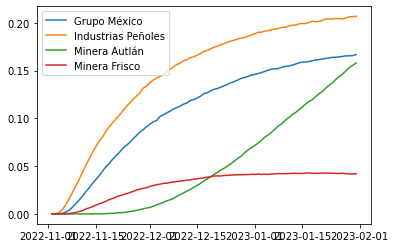

In [12]:
plt.figure()
plt.plot(ps_GM, label='Grupo México')
plt.plot(ps_PO, label = 'Industrias Peñoles')
plt.plot(ps_AUT, label = 'Minera Autlán')
plt.plot(ps_MFRIS, label = 'Minera Frisco')
plt.legend(loc='best')

Observamos que Grupo México e Industrias Peñolas fueron las dos empresas con mayor probabilidad de tener un rendimiento mayor a 18%, que son justamente las empresas que menciona el artículo. Grupo México tiene más de un 20% de probabilidades de alcanzar dicho rendimiento, mientras que Industrias Peñoles tiene un probabilidad superior al 15%. Sin embargo, podemos observar que es posible que Minera Autlán en un plazo de tiempo mayor, obtenga mejores rendimientos que Industrias Peñoles.

**El algoritmo condujo a una solución factible.**

## Conclusión
Podemos observar que, en efecto, las compañías mencionadas por el artículo tienen mejores proyecciones que las otras minerías que, aunque pertenecen al mismo sector, no son mencionadas en el artículo. De hecho podemos observar en la gráfica que la mejor opción para invertir es la empresa de Industrias Peñoles pues obtuvo mejor rendimiento contra las demás sobrepasando el 20% de rendimiento esperado, el inversionista debería elegir esta empresa del sector de minería para completar su portafolio de inversión.
Por otro lado podemos concluir que simular los precios de una acción a partir de sus rendimientos pasados puede ser una buena opción para tener una noción de el rumbo que tomará el precio de la acción, sin embargo, hay que recordar que hay muchos factores involucrados en el precio de la acción, por ello, si queremos realizar una simulación lo más apegada a la realidad posible, es necesario tomar en cuenta todos los factores que influyen en su precio. Esto es lo que puede diferenciar una simple simulación de una excelente.

## Referencias

Yahoo Finance - Stock Market Live, Quotes, Business & Finance News. (s/f).
Recuperado el 31 de octubre de 2022, de https://finance.yahoo.com/

Rosalia, L. (2022, January 11). ESTAS SON LAS ACCIONES DE LA BOLSA MEXICANA MÁS ATRACTIVAS PARA 2022. Expansion . Recuperado el 31 de octubre de 2022, from https://expansion.mx/mercados/2022/01/11/acciones-bolsa-mexicana-atractivas-2022?_amp=true 